In [1]:
# Import library
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Problem

We want to maximize the total number of chairs and tables by using available wood and workers.

|           | Wood | Worker |
|-----------|------|--------|
| Chair     | 1    | 2      |
| Table     | 2    | 1      |
| Available | 6    | 6      |

The table show the resources required (on average) for an ideal case.

## Ideal case - simple linear programming

Assume the resource consumption is exact.

In [2]:
# Coefficients of the cost function
cost = -np.array([1., 1.]) # convert into a minimize problem

# Coefficients of the constraints
cons1 = np.array([1., 2.])
cons2 = np.array([2., 1.])

# Cost function
fun = lambda x: np.sum(cost * x)

# Constraints - ineq: greater than 0
cons = ({'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons1 * x)},
        {'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons2 * x)})

# Bounds
bnds = ((0, None),(0, None))

# Initial guess
guess = np.array([1., 1.])

In [3]:
# Optimize
res = opt.minimize(fun, guess, method = 'SLSQP', bounds = bnds, constraints = cons, tol = 1e-8)
res

     fun: -4.0
     jac: array([-1., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 2.,  2.])

In [4]:
res.x

array([ 2.,  2.])

In [5]:
print("objective:", np.sum(cost * res.x))
print("constraint 1:", round(np.sum(cons1 * res.x), 6) <= 6)
print("constraint 2:", round(np.sum(cons2 * res.x), 6) <= 6)

objective: -4.0
constraint 1: True
constraint 2: True


## Deal with uncertainty

What if the resource consumption is uncertaion? i.e., the coeffiecients deviate form its nominal (average) value.  

|           | Wood    | Worker  |
|-----------|---------|---------|
| Chair     | 1 ± 0.8 | 2 ± 1   |
| Table     | 2 ± 1.5 | 1 ± 0.5 |
| Available | 6       | 6       |

### Optmistic case

We will use the least resource to produce more units.

|           | Wood          | Worker        |
|-----------|---------------|---------------|
| Chair     | 1 - 0.8 = 0.2 | 2 - 1 = 1     |
| Table     | 2 - 1.5 = 0.5 | 1 - 0.5 = 0.5 |
| Available | 6             | 6             |

In [6]:
# Coefficients of the cost function
cost = -np.array([1., 1.]) # convert into a minimize problem

# Coefficients of the constraints
cons1 = np.array([0.2, 0.5])
cons2 = np.array([1.0, 0.5])

# Cost function
fun = lambda x: np.sum(cost * x)

# Constraints - ineq: greater than 0
cons = ({'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons1 * x)},
        {'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons2 * x)})

# Bounds
bnds = ((0, None),(0, None))

# Initial guess
guess = np.array([1., 1.])

In [7]:
# Optimize
res = opt.minimize(fun, guess, method = 'SLSQP', bounds = bnds, constraints = cons, tol = 1e-8)
res

     fun: -11.999999999998888
     jac: array([-1., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  1.53785614e-13,   1.20000000e+01])

In [8]:
res.x

array([  1.53785614e-13,   1.20000000e+01])

In [9]:
print("objective:", np.sum(cost * res.x))
print("constraint 1:", round(np.sum(cons1 * res.x), 6) <= 6)
print("constraint 2:", round(np.sum(cons2 * res.x), 6) <= 6)

objective: -12.0
constraint 1: True
constraint 2: True


### Pessimistic case

We will use the most resource to produce less units.

|           | Wood          | Worker        |
|-----------|---------------|---------------|
| Chair     | 1 + 0.8 = 1.8 | 2 + 1 = 3     |
| Table     | 2 + 1.5 = 3.5 | 1 + 0.5 = 1.5 |
| Available | 6             | 6             |

In [10]:
# Coefficients of the cost function
cost = -np.array([1., 1.]) # convert into a minimize problem

# Coefficients of the constraints
cons1 = np.array([1.8, 3.5])
cons2 = np.array([3.0, 1.5])

# Cost function
fun = lambda x: np.sum(cost * x)

# Constraints - ineq: greater than 0
cons = ({'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons1 * x)},
        {'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons2 * x)})

# Bounds
bnds = ((0, None),(0, None))

# Initial guess
guess = np.array([1., 1.])

In [11]:
# Optimize
res = opt.minimize(fun, guess, method = 'SLSQP', bounds = bnds, constraints = cons, tol = 1e-8)
res

     fun: -2.461538462207861
     jac: array([-1., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1.53846154,  0.92307692])

In [12]:
res.x

array([ 1.53846154,  0.92307692])

In [13]:
print("objective:", np.sum(cost * res.x))
print("constraint 1:", round(np.sum(cons1 * res.x), 6) <= 6)
print("constraint 2:", round(np.sum(cons2 * res.x), 6) <= 6)

objective: -2.46153846221
constraint 1: True
constraint 2: True


### Robust optimization

The optmization model can represent as this form:

\begin{array}{r l}
    \max        & z = \sum_{j=1}^{n} c_j x_j & \\
    \text{s.t.} & \sum_{j=1}^{n} a_{ij} x_{j} \leq b_i & \forall\, i=1,\dotsc,m \\
                & x_j \geq 0 & \forall\, j=1,\dotsc,n \\
\end{array}

, where $a_{ij} \in [\bar a_{ij} -\hat a_{ij},\bar a_{ij} +\hat a_{ij}]$

We can define the **uncerrtainty set** as:

$\mathcal U_i = \{ a_{ij}\in \mathbb {R} : a_{ij}= \bar a_{ij} + \hat a_{ij}d_{ij}, -1 \leq d_{ij} \leq 1, \sum_{j \in J_i} d_{ij} \leq \Gamma_i  \}$

,where $\Gamma_i$ can be at most equal to the number of the uncertain parameters in the $i^{th}$ contraint; $J_i$ is the set of indexes of the constraints.

\begin{array}{r l}
\max & z = \sum_{j=1}^{n} c_j x_j & \\
\text{s.t.} & \sum_{j=1}^{n} \bar a_{ij} x_{j} + \max_{S_i \subseteq J_i, |S_i| = \Gamma_i} { \sum_{j \in S_i} \hat a_{ij} y_j } \leq b_i & \forall\, i=1,\dotsc,m \\
& x_j \leq y_j & \forall\, j=1,\dotsc,n\\
& x_j \geq 0,y_j \geq 0  & \forall\, j=1,\dotsc,n
\end{array}

If $\Gamma_i = 0$, then it becomes the nominal problem; if m > $\Gamma_i$ > 0, we are looking for the worst-case.

Use strong duality to take care of the max in the constraint, and substitute the the objective of the dual problem into the constraint.

\begin{array}{r l}
\max & z = \sum_{j=1}^{n} c_j x_j \\
s.t.
& \sum_{j=1}^{n} \bar a_{ij} x_{j} + z_i \Gamma_i + \sum_{j \in J_i} p_{ij} \leq b_i & \forall i \\
& z_i + p_{ij} \geq \hat a_{ij} y_j & \forall i, j\in J_i\\
& x_j \leq y_j & \forall j=1,...,n\\
& p_{ij} \geq 0 & \forall i, j \in J_i\\
& z_i \geq 0 & \forall i\\
& x_j \geq 0,y_j \geq 0  & \forall j
\end{array}

Therefore, the original problem can be reformulated to:

\begin{array}{r l}
\max & z =x_1 + x_2 \\
s.t.
& 2x_1 + x_2 + z_1 \Gamma_1 + p_{11} + p_{12} \leq 6 \\
& x_1 + 2x_2 + z_2 \Gamma_2 + p_{21} + p_{22} \leq 6 \\
& z_1 + p_{11} \geq y_1\\
& z_1 + p_{12} \geq 0.5 y_2\\
& z_2 + p_{21} \geq 0.8 y_1\\
& z_2 + p_{22} \geq 1.5 y_2\\
& x_1 \leq y_1 \\
& x_2 \leq y_2 \\
& p_{ij} \geq 0 ,\forall i,j\\
& z_1,z_2 \geq 0\\
& y_1, y_2 \geq 0\\
& x_1,x_2 \geq 0
\end{array}

In [14]:
def robust(g):
    # Coefficients of the cost function
    cost = -np.array([1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) # convert into a minimization problem

    # Coefficients of the constraints
    # [x1, x2, y1, y2, z1, z2, p11, p12, p21, p22]
    cons1 = np.array([ 2.0, 1.0, 0.0, 0.0,g[0], 0.0, 1.0, 1.0, 0.0, 0.0])
    cons2 = np.array([ 1.0, 2.0, 0.0, 0.0, 0.0,g[1], 0.0, 0.0, 1.0, 1.0])
    cons3 = np.array([ 0.0, 0.0,-1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0])
    cons4 = np.array([ 0.0, 0.0, 0.0,-0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0])
    cons5 = np.array([ 0.0, 0.0,-0.8, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0])
    cons6 = np.array([ 0.0, 0.0, 0.0,-1.5, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0])
    cons7 = np.array([-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons8 = np.array([ 0.0,-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

    # Cost function
    fun = lambda x: np.sum(cost * x)

    # Constraints - ineq: greater than 0
    cons = ({'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons1 * x)},
            {'type': 'ineq', 'fun': lambda x: 6 - np.sum(cons2 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons3 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons4 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons5 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons6 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons7 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons8 * x)}
           )

    # Bounds
    bnds = ((0, None),) * 10

    # Initial guess
    guess = np.ones(10)

    # Optimize
    res = opt.minimize(fun, guess, method = 'SLSQP', bounds = bnds, constraints = cons, tol = 1e-8)
    
    return res.x[0:2]

If we asumme the same level of uncertainty, i.e., gamma_1 = gamma_2

In [15]:
robust([0, 0])

array([ 2.,  2.])

In [16]:
x = np.linspace(0, 2, 21)
decision = [robust([i, i]) for i in x]

In [17]:
decision

[array([ 2.,  2.]),
 array([ 1.96301565,  1.87766714]),
 array([ 1.92118227,  1.77339901]),
 array([ 1.87702265,  1.68284789]),
 array([ 1.83206107,  1.60305343]),
 array([ 1.78723404,  1.53191489]),
 array([ 1.74311927,  1.46788991]),
 array([ 1.70006911,  1.40981341]),
 array([ 1.65829146,  1.35678392]),
 array([ 1.61790017,  1.3080895 ]),
 array([ 1.57894737,  1.26315789]),
 array([ 1.56950673,  1.22998078]),
 array([ 1.56114484,  1.19687771]),
 array([ 1.55389024,  1.1637646 ]),
 array([ 1.54777927,  1.13055182]),
 array([ 1.54285714,  1.09714286]),
 array([ 1.5391791 ,  1.06343284]),
 array([ 1.53681201,  1.02930665]),
 array([ 1.53583618,  0.99463676]),
 array([ 1.53634774,  0.95928054]),
 array([ 1.53846154,  0.92307692])]

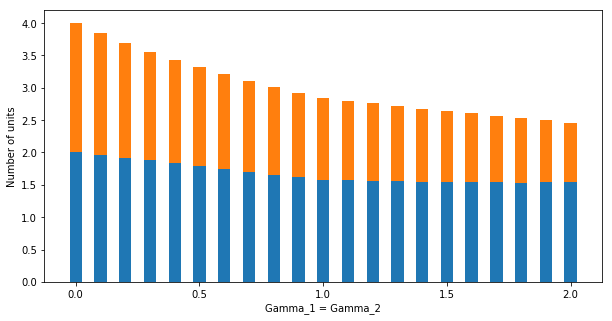

In [18]:
bar1 = []
bar2 = []

for i in decision:
    bar1.append(i[0])
    bar2.append(i[1])

plt.figure(figsize=(10, 5))
plt.bar(x, bar1, width = 0.05, align='center')
plt.bar(x, bar2, width = 0.05, align='center', bottom = bar1)
plt.xlabel("Gamma_1 = Gamma_2")
plt.ylabel("Number of units")
plt.show()